# Pick galaxies at random from a Schechter function

In [1]:
import numpy as np

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [10, 10]

In [ ]:
import numpy as np
def schechter_picker(N,alpha=-1.3, M_star=3.e10, M_min=1.e5):
    """ 
        Adapted from https://gist.github.com/joezuntz/5056136
        Based on algorithm in http://www.math.leidenuniv.nl/~gill/teaching/astro/stanSchechter.pdf
    """
    n=0
    output = []
    while n<N:
        M = np.random.gamma(scale=M_star, shape=alpha+2, size=N)
        M = M[M>M_min]
        u = np.random.uniform(size=M.size)
        M = M[u<M_min/M]
        output.append(M)
        n+=M.size
    return np.concatenate(output)[:N]

In [4]:
# Test the script version
from schechter_picker import schechter_picker

In [5]:
masses = schechter_picker(50000,-1.3,3.e10,1.e5)

/Users/hcferguson/anaconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 100 artists>

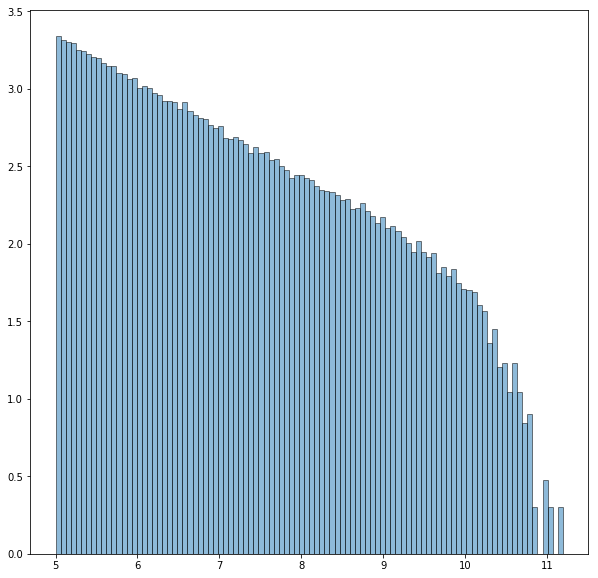

In [6]:
logm = np.log10(masses)
dndlogm,edges = np.histogram(logm,100)
plt.bar(edges[:-1], np.log10(dndlogm), width=np.diff(edges), ec="k", align="edge",alpha=0.5)